# Parallel Coordinates
Parallel coordinates is multi-dimensional feature visualization technique where the vertical axis is duplicated horizontally for each feature. Instances are displayed as a single line segment drawn from each vertical axes to the location representing their value for that feature. This allows many dimensions to be visualized at once; in fact given infinite horizontal space (e.g. a scrolling window), technically an infinite number of dimensions can be displayed!

Data scientists use this method to detect clusters of instances that have similar classes, and to note features that have high variance or different distributions. We can see this in action after first loading our occupancy classification dataset.

| Kind | Data type |
| ---- | ---- |
| Visualizers | ```ParallelCoordinates``` |
| Quick Methods | ```parallel_coordinates()``` |
| Models | Classification |
| Workflow | Feature analysis |

[API Reference](https://www.scikit-yb.org/en/latest/api/features/pcoords.html#module-yellowbrick.features.pcoords)

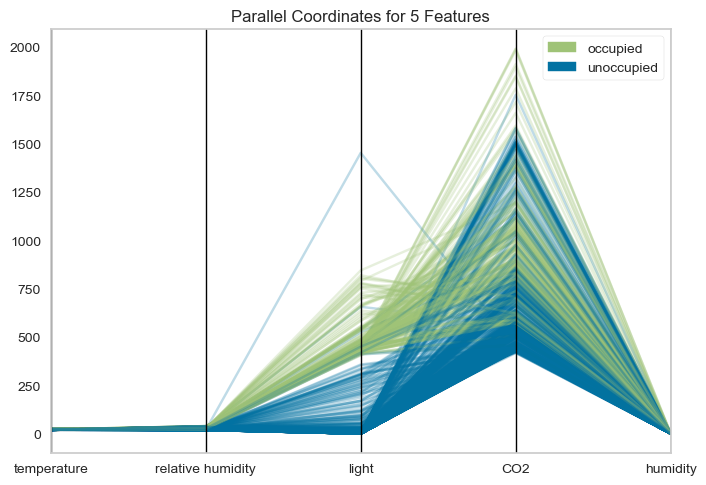

<Axes: title={'center': 'Parallel Coordinates for 5 Features'}>

In [1]:
from yellowbrick.features import ParallelCoordinates
from yellowbrick.datasets import load_occupancy

# Load the classification data set
X, y = load_occupancy()

# Specify the features of interest and the classes of the target
features = [
    "temperature", "relative humidity", "light", "CO2", "humidity"
]
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features, sample=0.05, shuffle=True
)

# Fit and transform the data to the visualizer
visualizer.fit_transform(X, y)

# Finalize the title and axes then display the visualization
visualizer.show()

By inspecting the visualization closely, we can see that the combination of transparency and overlap gives us the sense of groups of similar instances, sometimes referred to as “braids”. If there are distinct braids of different classes, it suggests that there is enough separability that a classification algorithm might be able to discern between each class.

Unfortunately, as we inspect this class, we can see that the domain of each feature may make the visualization hard to interpret. In the above visualization, the domain of the ```light``` feature is from in ```[0, 1600]```, far larger than the range of temperature in ```[50, 96]```. To solve this problem, each feature should be scaled or normalized so they are approximately in the same domain.

Normalization techniques can be directly applied to the visualizer without pre-transforming the data (though you could also do this) by using the ```normalize``` parameter. Several transformers are available; try using ```minmax```, ```maxabs```, ```standard```, ```l1```, or ```l2``` normalization to change perspectives in the parallel coordinates as follows:

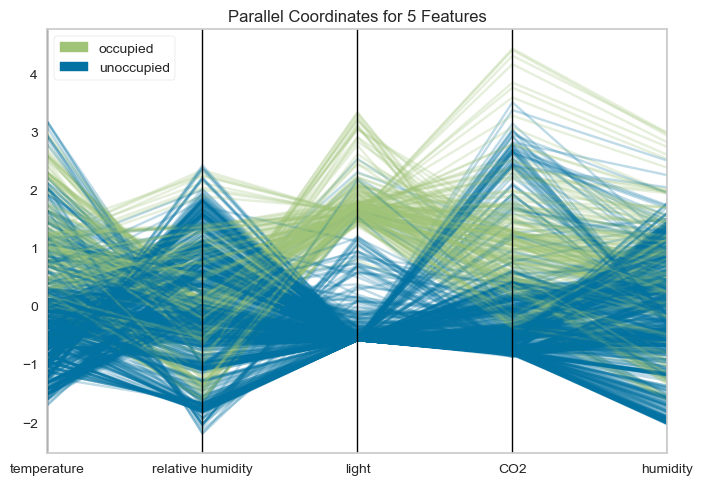

<Axes: title={'center': 'Parallel Coordinates for 5 Features'}>

In [2]:
from yellowbrick.features import ParallelCoordinates
from yellowbrick.datasets import load_occupancy

# Load the classification data set
X, y = load_occupancy()

# Specify the features of interest and the classes of the target
features = [
    "temperature", "relative humidity", "light", "CO2", "humidity"
]
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', sample=0.05, shuffle=True,
)

# Fit the visualizer and display it
visualizer.fit_transform(X, y)
visualizer.show()

Now we can see that each feature is in the range ```[-3, 3]``` where the mean of the feature is set to zero and each feature has a unit variance applied between ```[-1, 1]``` (because we’re using the ```StandardScaler``` via the ```standard``` normalize parameter). This version of parallel coordinates gives us a much better sense of the distribution of the features and if any features are highly variable with respect to any one class.

## Faster Parallel Coordinates
Parallel coordinates can take a long time to draw since each instance is represented by a line for each feature. Worse, this time is not well spent since a lot of overlap in the visualization makes the parallel coordinates less understandable. We propose two solutions to this:

1. Use ```sample = 0.2``` and ```shuffle = True``` parameters to shuffle and sample the dataset being drawn on the figure. The sample parameter will perform a uniform random sample of the data, selecting the percent specified.
1. Use the ```fast = True``` parameter to enable “fast drawing mode”.

The “fast” drawing mode vastly improves the performance of the parallel coordinates drawing algorithm by drawing each line segment by class rather than each instance individually. However, this improved performance comes at a cost, as the visualization produced is subtly different; compare the visualizations in fast and standard drawing modes below:

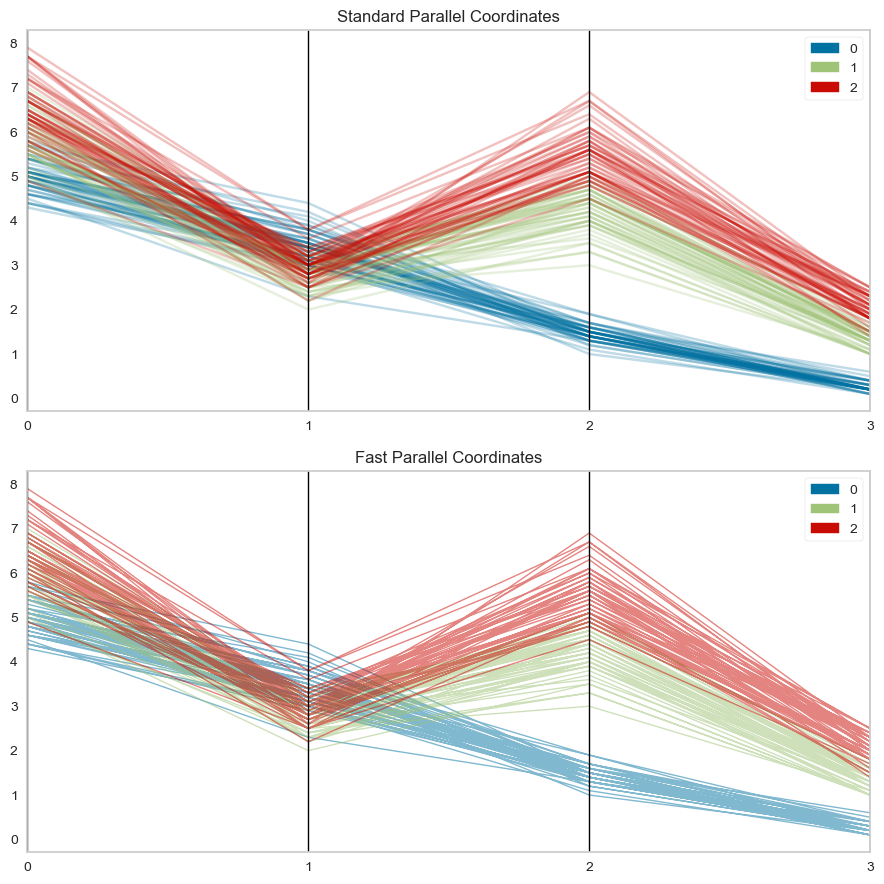

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from yellowbrick.features import ParallelCoordinates

data = load_iris()

_, axes = plt.subplots(nrows=2, figsize=(9,9))

for idx, fast in enumerate((False, True)):
    title = "Fast Parallel Coordinates" if fast else "Standard Parallel Coordinates"
    oz = ParallelCoordinates(ax=axes[idx], fast=fast, title=title)
    oz.fit_transform(data.data, data.target)
    oz.finalize()

plt.tight_layout()

As you can see the “fast” drawing algorithm does not have the same build up of color density where instances of the same class intersect.
Because there is only one line per class, there is only a darkening effect between classes.
This can lead to a different interpretation of the plot, though it still may be effective for analytical purposes, particularly when you’re plotting a lot of data. Needless to say, the performance benefits are dramatic:

## Quick Method
The same functionality above can be achieved with the associated quick method ```parallel_coordinates```.
This method will build the ```ParallelCoordinates``` object with the associated arguments, fit it, then (optionally) immediately show it.

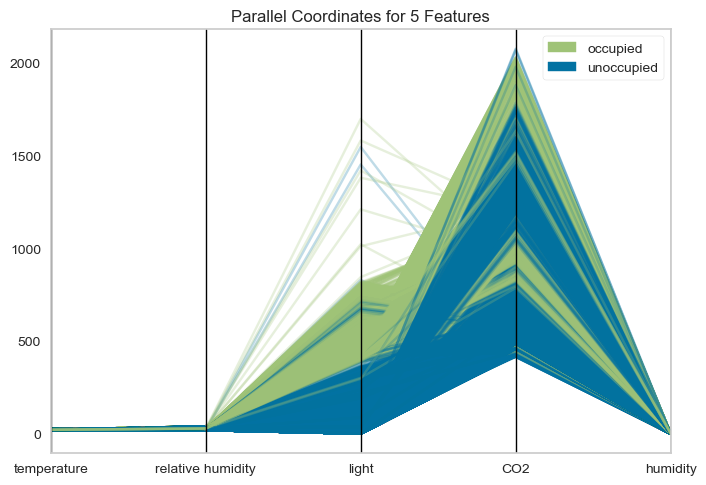

In [4]:
from yellowbrick.features.pcoords import parallel_coordinates
from yellowbrick.datasets import load_occupancy

# Load the classification data set
X, y = load_occupancy()

# Specify the features of interest and the classes of the target
features = [
    "temperature", "relative humidity", "light", "CO2", "humidity"
]
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
visualizer = parallel_coordinates(X, y, classes=classes, features=features)